In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plot
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## About the Data

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Dataset Attribute Information
1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

This dataset was obtained from Kaggle. This is the link: https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [3]:
stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv") 

### Diving into the DataSet

In [4]:
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
stroke_df.shape

(5110, 12)

In [6]:
#Names of Columns 
columns=stroke_df.columns[1:] #ignore id
columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [7]:
print('Check for missing values:\n',stroke_df[columns].isna().sum())

Check for missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### Checking for Unique Values in main features

In [8]:
stroke_df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:
stroke_df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [10]:
stroke_df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [11]:
stroke_df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [12]:
stroke_df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [13]:
stroke_df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

### Plotting counterplots for features

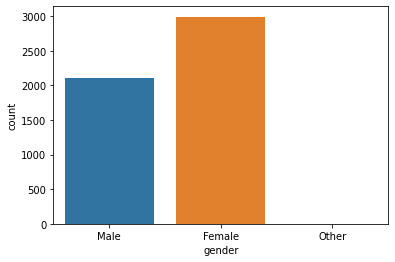

In [14]:
sns.countplot(x = stroke_df['gender']);

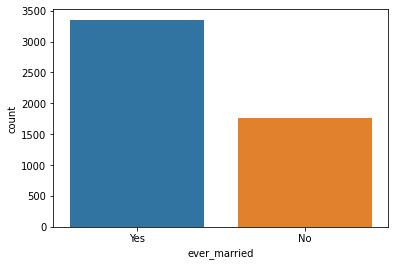

In [15]:
sns.countplot(x = stroke_df['ever_married']);

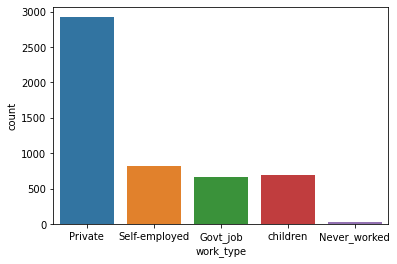

In [16]:
sns.countplot(x = stroke_df['work_type']);

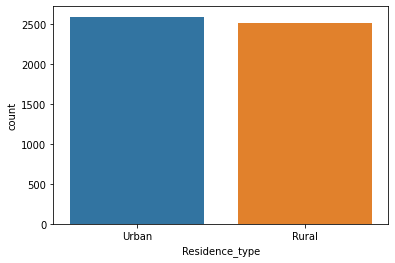

In [17]:
sns.countplot(x = stroke_df['Residence_type']);

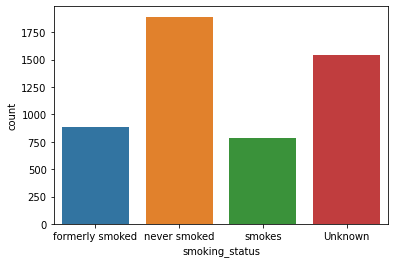

In [18]:
sns.countplot(x = stroke_df['smoking_status']);

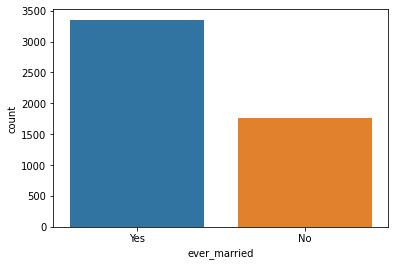

In [19]:
sns.countplot(stroke_df['ever_married']);

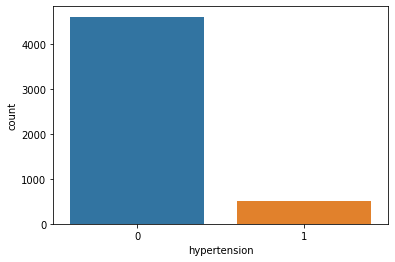

In [20]:
sns.countplot(stroke_df['hypertension']);

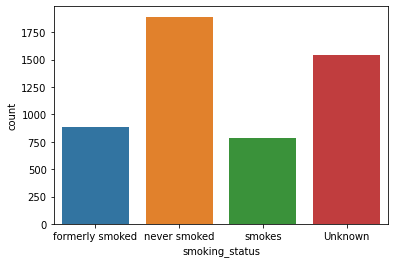

In [21]:
sns.countplot(x = stroke_df['smoking_status']);

In [22]:
stroke_df['smoking_status'].replace('Unknown', np.nan, inplace=True)

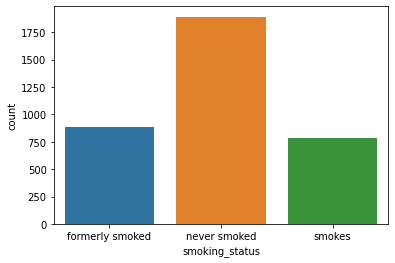

In [23]:
sns.countplot(x = stroke_df['smoking_status']);

### Some further explorations

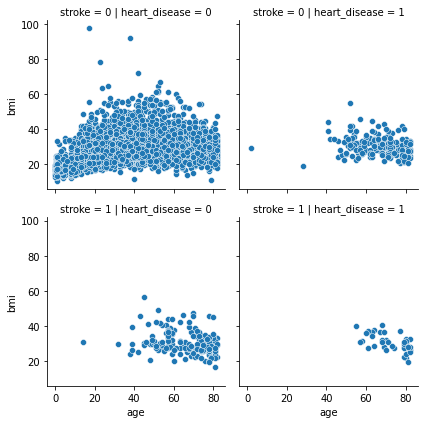

In [24]:
fg=sns.FacetGrid(stroke_df,'stroke','heart_disease');
fg.map(sns.scatterplot,'age','bmi');

<Figure size 576x576 with 0 Axes>

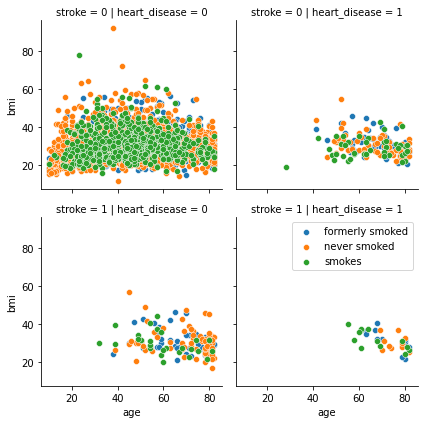

In [25]:
plt.figure(figsize=(8,8))
fg=sns.FacetGrid(stroke_df,'stroke','heart_disease',hue='smoking_status')
fg.map(sns.scatterplot,'age','bmi')
plt.legend();

### Compensating for the mssing BMI values (Data Cleaning)

In [26]:
# Fill the missing BMI with the mean
stroke_df['bmi'].fillna(stroke_df['bmi'].mean(), inplace=True)

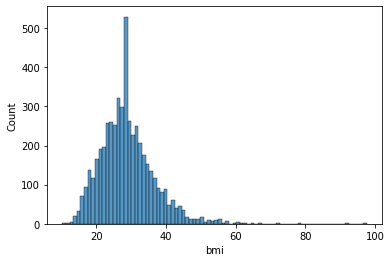

In [27]:
sns.histplot(stroke_df["bmi"]);

### Label Encoding the Data

In [28]:
le = LabelEncoder()

# encoded data
en_data = stroke_df.apply(le.fit_transform)

en_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,240,0,1
1,3610,0,82,0,0,1,3,0,3588,162,1,1
2,2151,1,101,0,1,1,2,0,2483,199,1,1
3,4226,0,70,0,0,1,2,1,3385,218,2,1
4,114,0,100,1,0,1,3,0,3394,113,1,1


### Feature Extraction

In [29]:
X = en_data.drop('stroke', axis = 1)
y = en_data['stroke']

### Splitting Data into Training and Testing sets

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2, stratify=y)

### Standardizing the Data

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Fitting a Model

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [33]:
clf = svm.SVC()
clf.fit(X_train,y_train)
y_pred1 = clf.predict(X_test)

In [34]:
print(classification_report(y_pred1, y_test))
acc_score1 = accuracy_score(y_pred1, y_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1533
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1533
   macro avg       0.50      0.48      0.49      1533
weighted avg       1.00      0.95      0.97      1533



In [35]:
print(f"The Accuracy Score of the SVM model is: {acc_score1*100}%")

The Accuracy Score of the SVM model is: 95.10763209393346%


In [48]:
# Logistic Regression Model
model_logistic = LogisticRegression()
model_logistic.fit(X_train,y_train)
y_pred2 = model_logistic.predict(X_test)

In [49]:
print(classification_report(y_pred2, y_test))
acc_score2 = accuracy_score(y_pred2, y_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1533
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1533
   macro avg       0.50      0.48      0.49      1533
weighted avg       1.00      0.95      0.97      1533



In [122]:
print(f"The Accuracy Score of the Logistic Model is: {acc_score2*100}%")

The Accuracy Score of the Logistic Model is: 95.10763209393346%


In [38]:
# Random Forests Model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred3 = model_rf.predict(X_test)

In [39]:
print(classification_report(y_pred3, y_test))
acc_score3 = accuracy_score(y_pred3, y_test)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1533
           1       0.00      0.00      0.00         0

    accuracy                           0.95      1533
   macro avg       0.50      0.48      0.49      1533
weighted avg       1.00      0.95      0.97      1533



In [40]:
print(f"The Accuracy Score of the Random Forest Model is: {acc_score3*100}%")

The Accuracy Score of the Random Forest Model is: 95.10763209393346%
